The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Statevector([ 0.41312536-0.02001214j, -0.05671293-0.08536107j,
             -0.09206511-0.17996323j, -0.17102414+0.00876422j,
              0.3875112 +0.43928848j, -0.38788799-0.06133545j,
             -0.00644378+0.13978048j,  0.0488968 +0.47844104j],
            dims=(2, 2, 2))
[0.17107305 0.01050287 0.04086275 0.02932607 0.3431393  0.15421913
 0.0195801  0.23129673]


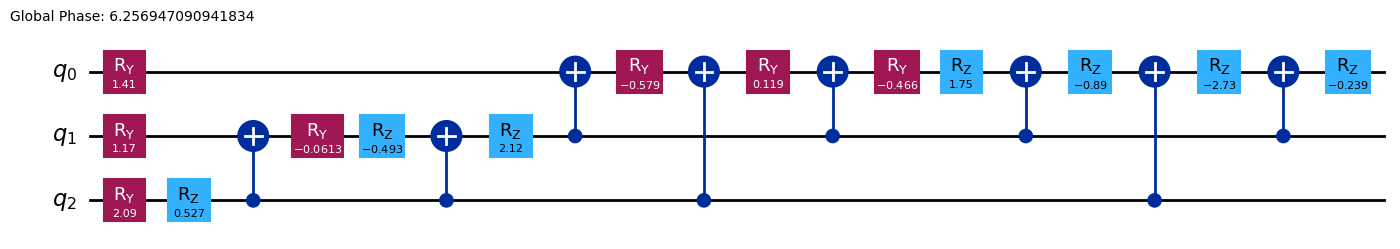

In [17]:
import qiskit
import qiskit.quantum_info
import numpy as np
import time
%load_ext autoreload
%autoreload 2
def transpiled_circuit(qc):
    qc = qiskit.transpile(qc, optimization_level = 2)
    return qc

def transpiled_circuit_clifford(qc):
    qc = qiskit.transpile(qc, 
        basis_gates=['h', 'cx', 's',
                    'rx','ry','rz'])
    return qc

def haar(num_qubits: int):
    """
    to generate random matrix for Haar measure
    see https://arxiv.org/pdf/math-ph/0609050.pdf
    """
    d = 2**num_qubits
    array = (np.random.randn(d,d) + 1j*np.random.randn(d,d))/np.sqrt(2.0)
    ortho,upper = np.linalg.qr(array)
    diag = np.diagonal(upper)
    temp = diag/np.absolute(diag)
    result = np.multiply(ortho,temp,ortho)
    basic_state = np.zeros(d)
    basic_state[0] = 1
    return result @ basic_state

num_qubits = 3
state = haar(num_qubits)
qc = qiskit.QuantumCircuit(num_qubits)
qc.prepare_state(state, list(range(0, num_qubits)))
qc_transpiled = transpiled_circuit_clifford(qc)
print(qiskit.quantum_info.Statevector.from_instruction(qc_transpiled))
print(qiskit.quantum_info.Statevector.from_instruction(qc).probabilities())
qc_transpiled.draw('mpl')

In [20]:
from problem import qrc
%load_ext autoreload
%autoreload 2
circuit = qrc.qrc_Qsun(3, 10)
circuit.visual_circuit()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
|Q_0> : RY-------H-----RZ----RZ----------S--------RZ----x-----RX-------H--x------M
                                                        |                 |       
|Q_1> : ---x--S-----------o-----x-----RX-------S--------o--------RZ-o-----o------M
           |              |     |                                   |             
|Q_2> : ---o--------H-----x-----o--S--------RX-------RY----RX-------x--------H---M
                                                                                  


In [44]:
circuit = qrc.qrc_ProjectQ(3, 10)
print(circuit)

(Note: This is the (slow) Python simulator.)
[0.0619007  0.01552986 0.55685441 0.13970558 0.0197759  0.00496145
 0.16090395 0.04036815]


C:\Users\haime\AppData\Local\Temp\ipykernel_12144\2584160052.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


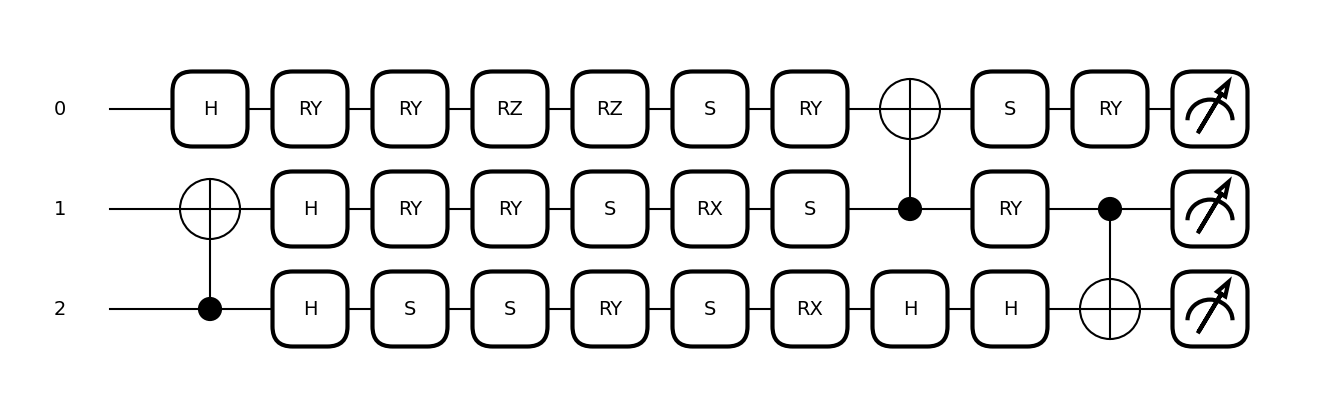

In [26]:
import pennylane as qml 
fig, ax = qml.draw_mpl(qrc.qrc_Pennylane)(3, 10)
fig.show()

In [33]:
qc = qrc.qrc_Qiskit(3, 10)
def qc_to_qasm(qc):
    from qiskit.qasm2 import dumps 
    return dumps(qc)
qasm = (qc_to_qasm(qc))
print(qasm)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
cx q[1],q[2];
ry(4.911132249987432) q[0];
cx q[1],q[2];
ry(1.058159877369799) q[0];
h q[1];
cx q[0],q[2];
cx q[2],q[1];
s q[0];
rx(1.8916622285586964) q[1];
cx q[2],q[0];
s q[1];
ry(5.757821345153947) q[0];
h q[2];
rz(6.246703066999321) q[1];
s q[2];
s q[0];
cx q[0],q[2];
s q[1];
cx q[1],q[0];
h q[2];
cx q[2],q[0];
ry(3.9878905421431394) q[1];


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from problem import qrc
import time
%load_ext autoreload
%autoreload 2
import constant
import json
# ---- Benchamrking PSR on Qsun ----
# timess = np.zeros((len(constant.packages), num_qubits))
funcs = [qrc.qrc_Qsun, qrc.qrc_ProjectQ, qrc.qrc_Qiskit, qrc.qrc_Pennylane]
packages = ['Qsun', 'ProjectQ', 'Qiskit', 'Pennylane']
server = 'cad114'

depths = 2
num_qubits = 4
num_repeats = 10
for j, package in enumerate(packages):
    print(f'-- Package: {package} --')
    for depth in range(1, depths + 1):
        print(f'-- # depth: {depth} --')
        timess = []
        for num_qubit in range(3, num_qubits + 1):
            print(f'-- # qubits: {num_qubit} --')
            times = []
            for _ in range(num_repeats):
                start = time.time()
                prob = funcs[j](num_qubit, depth)
                end = time.time()
                times.append(end-start)
            timess.append(np.mean(times))
        
        np.savetxt(f'./time/qrc/QRC_{package}_{server}_depth{depth}_Time.txt', timess)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
-- Package: Qsun --
-- # depth: 1 --
-- # qubits: 3 --
-- # qubits: 4 --
-- # depth: 2 --
-- # qubits: 3 --
-- # qubits: 4 --
-- Package: ProjectQ --
-- # depth: 1 --
-- # qubits: 3 --
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
-- # qubits: 4 --
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python s

10
10
10
10


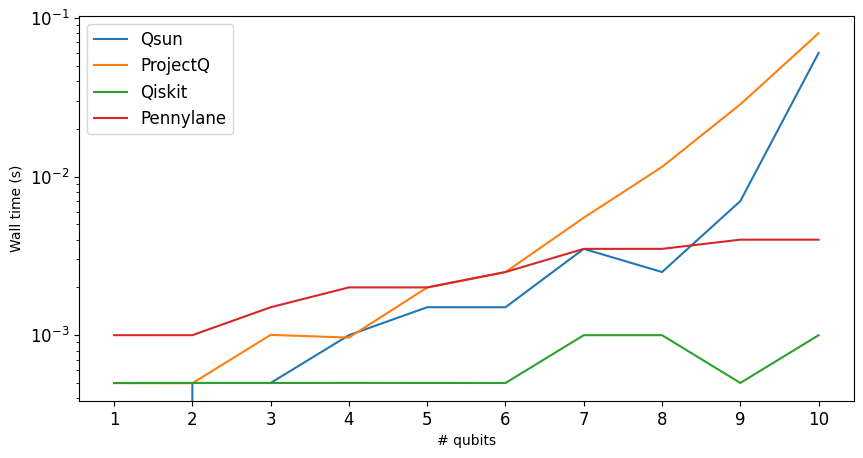

In [16]:
import matplotlib.pyplot as plt
packages = ['Qsun', 'ProjectQ', 'Qiskit', 'Pennylane']
plt.figure(figsize=(10, 5))
for j in range(len(timess)):
    print(len(timess[j]))
    plt.plot(range(1, num_qubits + 1), timess[j], label=packages[j]) 

plt.xticks(range(1, num_qubits + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')
plt.xlabel('# qubits')
plt.legend(fontsize=12)
plt.ylabel('Wall time (s)')
plt.show()
# plt.savefig('compare_time_QCD_projectq.png')